# <span><center><div style="font-family: Trebuchet MS; background-color: #e28743; color: #eeeee4; padding: 12px; line-height: 1;">Customer Segmentation with Clustering Models</div></center></span>

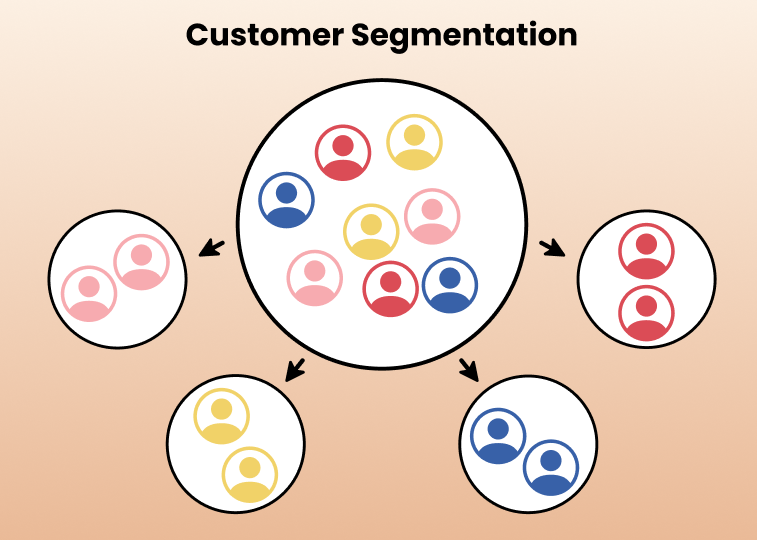


<figcaption>Photo by <a href="https://www.linkedin.com/in/naufalaldyp/">Naufal Aldy Pradana (me)
  </figcaption>

## Bussiness Understanding

Customer segmentation is a marketing strategy that involves dividing a customer base into groups of individuals who have similar needs or characteristics. By grouping customers into segments, businesses can better tailor their marketing messages, product offerings, and customer experiences to meet the specific needs and preferences of each group.

## Data Understanding
The data source used on this project is from the following site https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

- CustomerID: Unique ID assigned to customer
- Gender: Gender of customer
- Age: Age of customer (18-70)
- Annual Income (k$): Annual income of the customer in dollars
- Spending Score: Score assigned by the mall based on customer behavior and spending nature


# <span><center><div style="font-family: Trebuchet MS; background-color: #e28743; color: #eeeee4; padding: 12px; line-height: 1;">Import Necessary Library</div></center></span>

In [108]:
# Exploration purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper.functions import plot_histogram_outlier, plot_correlation_heatmap

# Clustering purpose
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing

# <span><center><div style="font-family: Trebuchet MS; background-color: #e28743; color: #eeeee4; padding: 12px; line-height: 1;">Load Dataset</div></center></span>

In [109]:
dataset_name = 'Mall_Customers.csv'
dataset_dir = f'./dataset/{dataset_name}'

In [110]:
df = pd.read_csv(dataset_dir)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [111]:
# Rename column for easier data manipulation
df = df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)':'Spending'})

In [112]:
df

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# <span><center><div style="font-family: Trebuchet MS; background-color: #e28743; color: #eeeee4; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center></span>

## Check Basic Descriptive Statistic

In [113]:
# See basic stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [114]:
# Check null value
df.isnull().any()

CustomerID    False
Gender        False
Age           False
Income        False
Spending      False
dtype: bool

In [115]:
# Check duplicate value
duplicates = df[df.duplicated(['CustomerID', 'Gender', 'Age', 'Income', 'Spending'])]
if duplicates.empty:
    print("There's no duplicate record.")
else:
    print(f'Duplicates record found: {duplicates}')


There's no duplicate record.


In [116]:
df.describe()

,CustomerID,Age,Income,Spending
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Categorical Data Exploratory

<AxesSubplot:ylabel='Gender'>

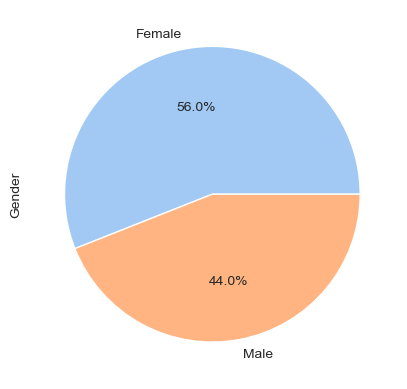

In [117]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')

From the plot above, it seems there's more female customers than male customers

In [118]:
# Drop customer ID Column because we won't use it
df = df.drop(columns='CustomerID')

## Numerical Data Exploratory

In [119]:
numerical_features = df.select_dtypes(exclude=object).columns.tolist()
numerical_features

['Age', 'Income', 'Spending']

### Univariate Analysis

In [120]:
help(plot_histogram_outlier)

Help on function plot_histogram_outlier in module helper.functions:

plot_histogram_outlier(dataframe, feature)
    This function is used to plot a histogram and a boxplot for a specified feature in a pandas DataFrame. 
    The function is intended to help visualize the distribution of the data and to detect any outliers.
    
    Parameters:
    -----------
    dataframe : pandas DataFrame
        The DataFrame containing the data to be plotted.
    feature : str
        The name of the feature to be plotted.
    
    Returns:
    --------
    None
    
    Examples:
    ---------
    >>> import seaborn as sns
    >>> df = sns.load_dataset('iris')
    >>> plot_histogram_outlier(df, 'sepal_length')



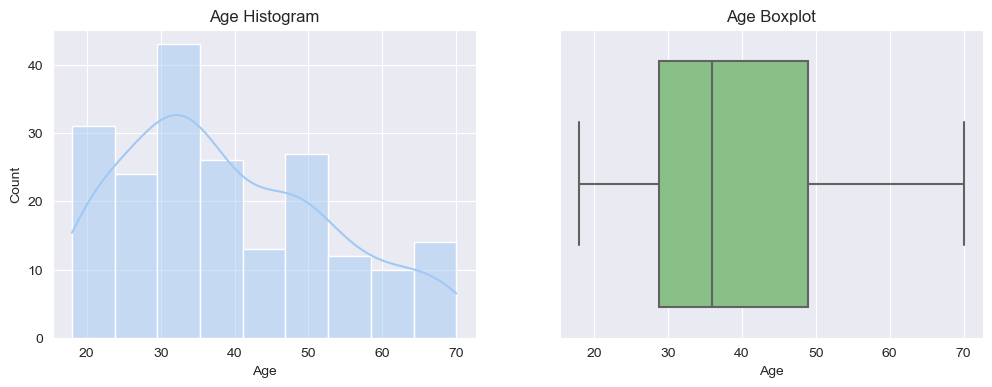

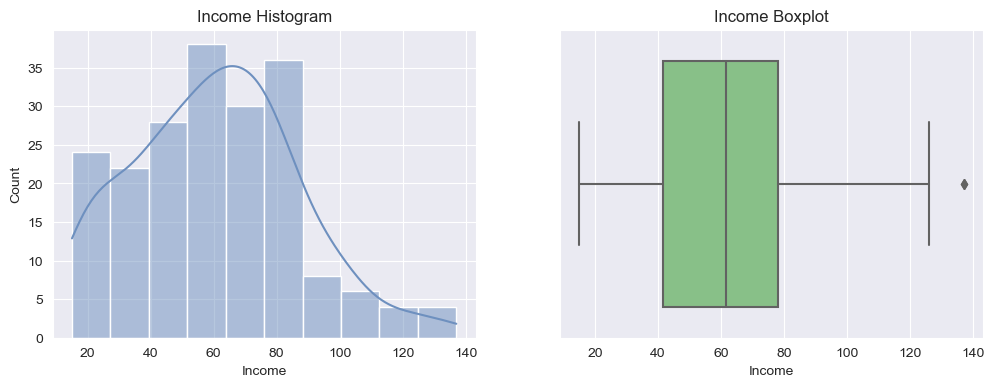

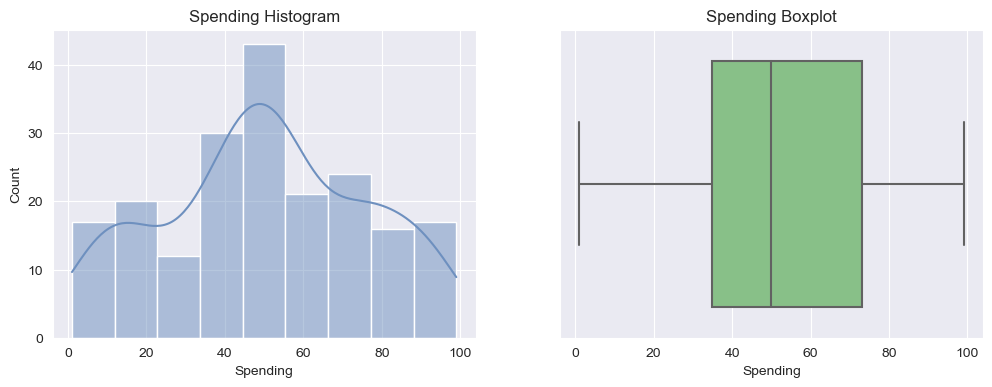

In [121]:
for feature in numerical_features:
    plot_histogram_outlier(df, feature)

From plots above, we can see that:
1. Age and Income feature have right-skewed distribution, while spending have normal distribution
2. There's a bit of outlier on Income feature
3. Age distribution is right skewed means that most of the customer on this mall younger side, with peak number on 30s
4. Income distribution is right skewed means that majority of these mall customer is people who have low to middle income
5. Spending have symmetrical distribution means the distribution is balance

### Remove Outlier

In [122]:
# Use IQR Method to get rid of outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

# Check if outlier have been dropped
df.shape

C:\Users\blitz\AppData\Local\Temp\ipykernel_18648\2982214092.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


(198, 4)

It seems like we have remove 2 outlier from Income feature

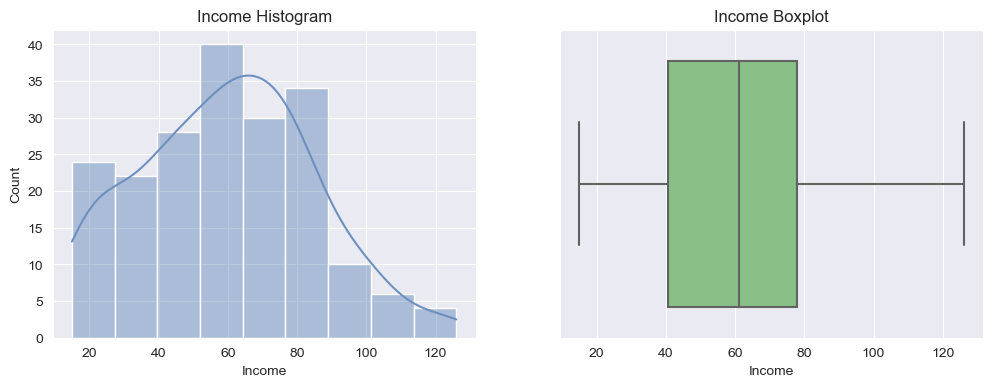

In [123]:
# Plot box one more to see whethere are still outlier
plot_histogram_outlier(df, 'Income')

### Bivariate Analysis

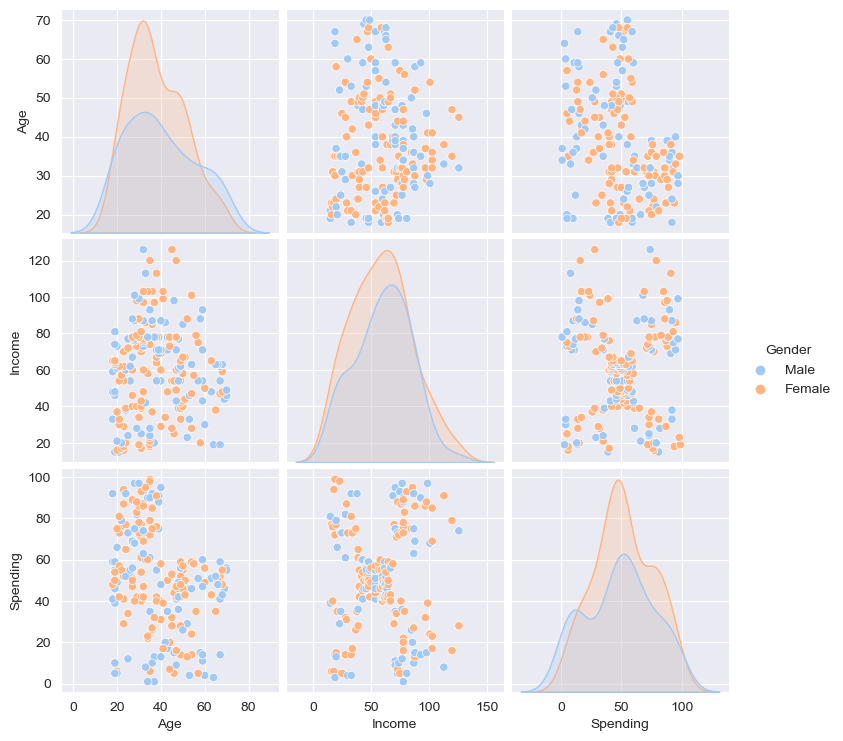

In [129]:
sns.pairplot(data=df, hue='Gender')
sns.set_palette('pastel')

### See Correlation Between Numerical Features

In [125]:
help(plot_correlation_heatmap)

Help on function plot_correlation_heatmap in module helper.functions:

plot_correlation_heatmap(correlation_matrix, cmap_color)
    This function is used to plot given correlation matrix into heatmap to better see the features correlation
    
    Parameters:
    -----------
    dataframe: pandas Dataframe
        The DataFrame containing the data to be plotted.
    
    Returns:
    --------
    None
    
    Examples:
    ---------
    >>> import seaborn as sns
    >>> df = sns.load_dataset('iris')
    >>> correlation_matrix = df[numerical_features].corr()
    >>> plot_correlation_heatmap(correlation_matrix)



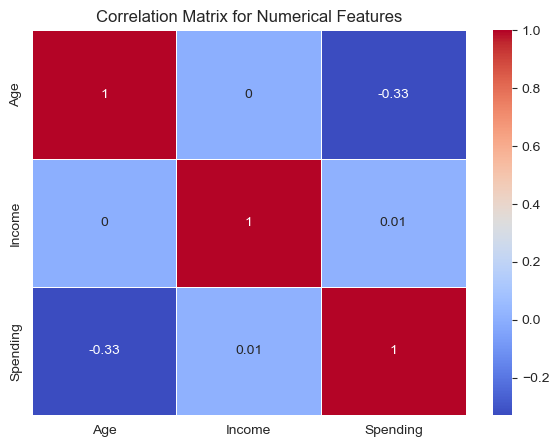

In [126]:
correlation_matrix = df.corr().round(2)
plot_correlation_heatmap(correlation_matrix, 'coolwarm')

From our correlation matrix above, it seems that most of our numerical feature have little or no linear relationship between each other.  And even some of it is inversely related (negative), means that with the increase of variable A, value of variable B tend to decrease. Which for example, we can see from our distribution above with the increase of One's age their spending tend to decreases.

# <span><center><div style="font-family: Trebuchet MS; background-color: #e28743; color: #eeeee4; padding: 12px; line-height: 1;">Data Preprocessing</div></center></span>

## Normalization
Normalization is used for features with data that does not display normal distribution 

In [127]:
scaler = MinMaxScaler()
df2 = df.copy(deep=True)

df2['Age'] = scaler.fit_transform(df[['Age']])
df2['Income'] = scaler.fit_transform(df[['Income']])
df2['Spending'] = scaler.fit_transform(df[['Spending']])

## Drop Categorical Value

From the bivariate analysis we can see that gender don't really provide much value on the pattern, so we gonna drop it


In [128]:
df2.drop(columns='Gender', inplace=True)
df2

,Age,Income,Spending
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.009009,0.051020
3,0.096154,0.009009,0.775510
4,0.250000,0.018018,0.397959
...,...,...,...
193,0.384615,0.882883,0.918367
194,0.557692,0.945946,0.153061
195,0.326923,0.945946,0.795918
196,0.519231,1.000000,0.275510


# Modelling